<h1>Kickstarter: Analisis Exploratorio de Datos</h1>

- Carlos
- Carlos
- Pablo


<h1>Un poco sobre Kickstarter: </h1>

<b>Kickstarter</b>
>Es una corporación estadounidense de beneficio público con sede en Brooklyn, Nueva York, que mantiene una plataforma global de financiación colectiva centrada en la creatividad. La misión declarada de la empresa es "ayudar a dar vida a proyectos creativos". Según los informes, Kickstarter ha recibido más de 1.9 mil millones de dolares en promesas de 9.4 millones de patrocinadores para financiar 257,000 proyectos creativos, como películas, música, espectáculos teatrales, cómics, periodismo, videojuegos, tecnología y proyectos relacionados con la comida.
>A las personas que respaldan los proyectos de Kickstarter se les ofrecen recompensas o experiencias tangibles a cambio de sus promesas. Este modelo tiene sus raíces en el modelo de suscripción de patrocinio artístico, en el que los artistas acudían directamente a sus audiencias para financiar su trabajo.


In [3]:
!pip install pandas
!pip install seaborn
!pip install plotly

In [4]:
#Load the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import plotly.tools as tls
import plotly
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

import warnings
from collections import Counter

In [5]:
#loading the data 
df_kick = pd.read_csv("ks-projects-201801.csv")
df_kick = df_kick.sample(10000, random_state=42).reset_index().drop('index', axis=1)

## Funciones de normalización.
- Con el fin a comprender el dataset con el que trabajaremos, sera elaborado un resumen del mismo que nos permitira ver con que clase de datos estaremos trabajando.</h2>

In [5]:
#resumetable, a partir de un dataset genera un resumen de su contenido incluyendo dtypes, cant de campos null, uniques, entropia
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Faltantes'] = df.isnull().sum().values    
    summary['Unicos'] = df.nunique().values
    summary['Primer valor'] = df.loc[0].values
    summary['Segundo valor'] = df.loc[1].values
    summary['Tercer valor'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropia'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary


In [6]:
#extrayendo informacion del dataset
resumetable(df_kick)

Dataset Shape: (10000, 15)


Name   dtypes  Faltantes  Unicos         Primer valor  \
0                 ID    int64          0   10000           1576537356   
1               name   object          0    9999                 Deko   
2           category   object          0     158             Hardware   
3      main_category   object          0      15           Technology   
4           currency   object          0      14                  USD   
5           deadline   object          0    2617           2015-10-24   
6               goal  float64          0     779                70000   
7           launched   object          0   10000  2015-09-24 03:12:52   
8            pledged  float64          0    4601                 1888   
9              state   object          0       6               failed   
10           backers    int64          0     718                   41   
11           country   object          0      23                   US   
12       usd pledged  float64        105    5165                 1888   
13  usd_pledged_real  float64          0    5660                 1888   
14     usd_goal_real  float64          0    2769                70000   

                                        Segundo valor           Tercer valor  \
0                                           675907016              361890770   
1   Westside BJ's: The Gluten-Free, Organic Food T...  Crepe Diem Food Truck   
2                                         Food Trucks                   Food   
3                                                Food                   Food   
4                                                 USD                    USD   
5                                          2015-02-01             2014-01-17   
6                                              250000                  30000   
7                                 2015-01-02 20:55:07    2013-12-18 03:26:04   
8                                                1466                   5723   
9                                              failed                 failed   
10                                                  9                     90   
11                                                 US                     US   
12                                               1466                   5723   
13                                               1466                   5723   
14                                             250000                  30000   

    Entropia  
0      13.29  
1      13.29  
2       6.24  
3       3.57  
4       1.27  
5      11.06  
6       6.50  
7      13.29  
8      10.16  
9       1.52  
10      6.52  
11      1.47  
12     10.16  
13     10.67  
14      8.19

><b>Resumen del contenido del dataset con el que se trabajara</b>

<h2>Conociendo el contenido del dataset</h2>

In [7]:
#Visualizando la informacion
df_kick.head()

ID                                               name     category  \
0  1576537356                                               Deko     Hardware   
1   675907016  Westside BJ's: The Gluten-Free, Organic Food T...  Food Trucks   
2   361890770                              Crepe Diem Food Truck         Food   
3  1225211551  Season's End - A horror novel ready for public...      Fiction   
4  2122944289        Colorado City Arizona Restaurant (Canceled)  Restaurants   

  main_category currency    deadline      goal             launched  pledged  \
0    Technology      USD  2015-10-24   70000.0  2015-09-24 03:12:52   1888.0   
1          Food      USD  2015-02-01  250000.0  2015-01-02 20:55:07   1466.0   
2          Food      USD  2014-01-17   30000.0  2013-12-18 03:26:04   5723.0   
3    Publishing      GBP  2016-11-23    5500.0  2016-10-24 15:44:36     25.0   
4          Food      USD  2015-05-13   30000.0  2015-03-14 05:18:34    100.0   

      state  backers country  usd pledged  usd_pledged_real  usd_goal_real  
0    failed       41      US      1888.00           1888.00       70000.00  
1    failed        9      US      1466.00           1466.00      250000.00  
2    failed       90      US      5723.00           5723.00       30000.00  
3    failed        2      GB        23.24             31.09        6839.01  
4  canceled        3      US       100.00            100.00       30000.00

><b>id:</b> ID interno de kickstarter

><b>name:</b>nombre del proyecto, un proyecto es un trabajo finito con un objetivo claro que le gustaría darle vida. Piense en álbumes, libros o películas.

><b>category:</b>categoria

><b>main_category:</b> categoria de la campaña de atraccion de patrocinadores a la que pertenece

><b>currency:</b> moneda utilizada para apoyar

><b>deadline:</b> fecha límite para crowdfunding

><b>goal:</b> Objetivo de recaudación de fondos: el objetivo de financiación es la cantidad de dinero que un creador necesita para completar su proyecto.

><b>launched:</b> fecha de lanzamiento

><b>pledged:</b> cantidad prometida por participantes

><b>state:</b> Estado actual en el que se encuentra el proyecto

><b>country:</b> pais

# Campo State
- Lo que en primera instancia parece informacion interesante la cual podemos agrupar e incluso visualizar a traves de un grafico es el estado de los proyectos</h2>

In [8]:
state = round(df_kick["state"].value_counts() / len(df_kick["state"]) * 100,2)

labels = list(state.index)
values = list(state.values)

trace1 = go.Pie(labels=labels, values=values, marker=dict(colors=['red', 'blue', 'green', 'yellow', 'cian', 'magenta']))

layout = go.Layout(title='Distribuition of States', legend=dict(orientation="h"));

fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

>>
La grafica evidencia el aglomerado de proyectos a partir su estado <br>
Como se puede obserbar solo el 36% de todos los proyectos han sido exitosos<br>
Mas de 60% han sido cancelados<br>

- Con esta informacion seria interesante conocer la distribucion de los proyectos y tomando en cuenta el porcentaje de proyectos que han fallado podriamos trabajar con este grupo. </h2>



# Trabajando sobre el grupo de Proyectos Fallidos.

In [9]:
df_kick.head()

ID                                               name     category  \
0  1576537356                                               Deko     Hardware   
1   675907016  Westside BJ's: The Gluten-Free, Organic Food T...  Food Trucks   
2   361890770                              Crepe Diem Food Truck         Food   
3  1225211551  Season's End - A horror novel ready for public...      Fiction   
4  2122944289        Colorado City Arizona Restaurant (Canceled)  Restaurants   

  main_category currency    deadline      goal             launched  pledged  \
0    Technology      USD  2015-10-24   70000.0  2015-09-24 03:12:52   1888.0   
1          Food      USD  2015-02-01  250000.0  2015-01-02 20:55:07   1466.0   
2          Food      USD  2014-01-17   30000.0  2013-12-18 03:26:04   5723.0   
3    Publishing      GBP  2016-11-23    5500.0  2016-10-24 15:44:36     25.0   
4          Food      USD  2015-05-13   30000.0  2015-03-14 05:18:34    100.0   

      state  backers country  usd pledged  usd_pledged_real  usd_goal_real  
0    failed       41      US      1888.00           1888.00       70000.00  
1    failed        9      US      1466.00           1466.00      250000.00  
2    failed       90      US      5723.00           5723.00       30000.00  
3    failed        2      GB        23.24             31.09        6839.01  
4  canceled        3      US       100.00            100.00       30000.00

- Empezaremos agrupando algunas categorias y luego filtrar los proyectos en dos grupos por estado (exitosos y fallidos)</h2>

In [10]:
df_kick = df_kick.loc[df_kick['state'].isin(['failed','successful'])]

# Distribucion de Metas
- En primer lugar, la razon por la que los proyectos fallan principalmente es debido a que no se alcanza la meta establecida. Por lo tanto analizaremos la distribucion de las metas que se alcanzaron y que no.

In [11]:
df_failed = df_kick[df_kick["state"] == "failed"].sample(10000, replace=True)
df_failed.head(5)

ID                                               name  \
5153  2104388973                                         Desert ICE   
341    332356313                                         Poly Dolls   
7873  1758801986  Moonbase Alpha 2: Use Gaming to teach Science ...   
9033  2087758998  Vision For All - Volontärresa till Påskön och ...   
2064   758547943  iPhotoBox Lite - The World’s Best Portable Pho...   

              category main_category currency    deadline      goal  \
5153            Drinks          Food      CAD  2014-09-26   50000.0   
341     Product Design        Design      AUD  2016-08-21   10000.0   
7873       Video Games         Games      USD  2015-11-07  480000.0   
9033            People   Photography      SEK  2016-03-25   25000.0   
2064  Camera Equipment    Technology      HKD  2016-10-14   70000.0   

                 launched  pledged   state  backers country  usd pledged  \
5153  2014-09-21 23:49:33     0.00  failed        0      CA         0.00   
341   2016-07-22 09:51:23     1.00  failed        1      AU         0.00   
7873  2015-10-07 16:29:39  4510.11  failed       87      US      4510.11   
9033  2016-03-17 18:30:57  2900.00  failed        6      SE       348.26   
2064  2016-09-14 04:47:02  7159.00  failed        3      HK         0.00   

      usd_pledged_real  usd_goal_real  
5153              0.00       44996.40  
341               0.76        7643.51  
7873           4510.11      480000.00  
9033            358.75        3092.64  
2064            922.68        9021.90

In [12]:
df_sucess = df_kick[df_kick["state"] == "successful"].sample(10000, replace=True)
df_sucess.head(5)

ID                                               name  \
5113   943218899                            Torn Apart (short film)   
1448  2126748341                                    The Moon and Me   
3346   329022331  Royal Tact Watch : A 138USD Mechanical Diver W...   
9431   846176038                                   The Knowledge II   
5410  1329441770            glassroots - A Food and Wine Revolution   

             category main_category currency    deadline      goal  \
5113  Science Fiction  Film & Video      GBP  2016-11-14     550.0   
1448        Art Books    Publishing      USD  2016-09-29    1800.0   
3346   Product Design        Design      HKD  2017-12-15  100000.0   
9431          Hip-Hop         Music      USD  2013-06-21     250.0   
5410      Restaurants          Food      CAD  2016-03-05   11000.0   

                 launched    pledged       state  backers country  \
5113  2016-10-12 15:09:47     572.69  successful       28      GB   
1448  2016-08-30 05:47:57    2158.00  successful       25      US   
3346  2017-11-15 11:56:21  190528.00  successful      137      HK   
9431  2013-06-05 22:43:55     250.00  successful        5      US   
5410  2016-02-04 17:31:03   11150.00  successful       70      CA   

      usd pledged  usd_pledged_real  usd_goal_real  
5113         0.00            706.01         678.04  
1448         0.00           2158.00        1800.00  
3346      7169.27          24390.71       12801.64  
9431       250.00            250.00         250.00  
5410      7922.22           8413.19        8300.01

In [18]:
#Primer plot
Goals = go.Histogram(
    x= np.log(df_kick.usd_goal_real + 1),
    histnorm='probability', showlegend=False,
    xbins=dict(
        start=-5.0,
        end=19.0,
        size=1),
    autobiny=True)

#Segundo plot
Pledged = go.Histogram(
    x = np.log(df_kick.usd_pledged_real + 1),
    histnorm='probability', showlegend=False,
    xbins=dict(
        start=-1.0,
        end=17.0,
        size=1))

# agregando al histograma
failed = np.log(df_failed['usd_goal_real']+1)
success = np.log(df_sucess["usd_goal_real"]+1)

goals_Failed = go.Histogram(
    x=failed,
    opacity=0.60, nbinsx=30, name='Metas no alcanzadas', histnorm='probability'
)
goals_success = go.Histogram(
    x=success,
    opacity=0.60, nbinsx=30, name='Metas alcanzadas', histnorm='probability'
)


data = [Goals, Pledged, goals_Failed, goals_success]
layout = go.Layout(barmode='overlay')

#Creando grilla
fig = plotly.tools.make_subplots(rows=2, cols=2, specs=[ [{'colspan': 2}, None], [{}, {}]],
                          subplot_titles=('Proyectos Exitosos y Fallidos',
                                          'Metas','Adjudicados'))

#orden de figuras
fig.append_trace(Goals, 2, 1)
fig.append_trace(Pledged, 2, 2)
fig.append_trace(goals_Failed, 1, 1)
fig.append_trace(goals_success, 1, 1)

fig['layout'].update(title="Distribuciones",
                     height=500, width=900, barmode='overlay')
iplot(fig)


- Interesante distribucion de los valores sobre las metas y lo que se obtuvo desde el periodo de lanzamiento hasta la fecha limite <br>
    - Observe el grafico con titulo Metas, el histograma simétrico en forma de campana clásico con la mayoría de los recuentos de frecuencias agrupados en el medio y con los recuentos desapareciendo en las colas. Desde el punto de vista de la ciencia física / ingeniería, la distribución normal es la distribución que ocurre con mayor frecuencia en la naturaleza (debido en parte al teorema del límite central). Por lo tanto seria ideal probar la normalidad de la distribucion de metas y si existe alguna diferencia estadistica entre proyectos exitosos y fallidos.</h2>

# Test de normalidad.
- Tomando en cuenta el grafico de Metas anterior y viendo que se asimila a una distibucion normal seria interesante probar si la distribucion de metas es normal
- Para probar si una distribución se ajusta a un conjunto de datos, El analisis de distribucion utiliza la transformación a la normal asociada con esa distribución. 
- Luego aplica una prueba de normalidad para ver si los valores transformados se ajustan a la distribución normal. El analizador de distribución incluye tres pruebas de normalidad: <b>Prueba de Anderson-Darling (AD)</b> <b>Prueba de Shapiro-Wilks (SW)</b>, <b>Prueba de asimetría-curtosis total (SK todo)</b>.

- Las tres pruebas anteriores están diseñadas para detectar todas las desviaciones de la normalidad. Responden a la pregunta: "¿Los datos se ajustan a la distribución normal?"

- En este caso y sabiendo que la libreria <b>spicy</b> nos permite hacer esta evaluacion utilizaremos el metodo de Shapiro-Wilks. La prueba rechaza la hipótesis de normalidad cuando el valor p es menor o igual a 0.05. No aprobar la prueba de normalidad nos permite afirmar con un 95% de confianza que los datos no se ajustan a la distribución normal. Pasar la prueba de normalidad solo le permite afirmar que no se encontró una desviación significativa de la normalidad.

In [19]:
stat, p = stats.shapiro(np.log(df_kick['usd_goal_real']+1).sample(500, random_state=42))

print("Shapiro stat:", stat)
print("P-value: ", p)
if p >= .01:
    print('Normal Distribution')
else:
    print("Non-Normal Distribution")

Shapiro stat: 0.9852833151817322
P-value:  6.028682037140243e-05
Non-Normal Distribution


- OK, Basado en los resultados vemos que el agrupamiento de las metas no sigue una distribucion normal.</h2>

- Teniendo en cuenta los resultados obtenidos ahora nos fijaremos en el grupo de proyectos exitosos. Sobre este grupo y partiendo de lo hallado acerca del grupo de proyectos fallidos podemos hacer 3 suposiciones:

    1. <b>Normalidad</b>. Suponemos que los datos de la población muestreada tienen una distribución normal (aunque probamos que este no es el caso podemos identificar la variacion). Esta suposición es particularmente importante para muestras pequeñas. En muestras más grandes (n> 30), el error estándar es menor y como resultado, esta suposición se vuelve menos crítica.
    2. <b>Muestreo aleatorio</b>. Suponemos que los datos medidos se obtuvieron de una muestra que se seleccionó mediante un procedimiento de muestreo aleatorio.
    3. <b>Independencia</b>. Suponemos que cada resultado u observación es independiente, lo que significa que un resultado no influye en otro. Específicamente, los resultados son independientes cuando la probabilidad de un resultado no tiene efecto sobre la probabilidad de otro resultado. El uso de muestreo aleatorio generalmente satisface este supuesto.

- Por lo tanto es posible calcular la <b>prueba T</b> de una muestra, que se utiliza para comparar un valor medio medido en una muestra con un valor conocido en la población. Específicamente, esta prueba se utiliza para probar hipótesis sobre la media de uno o dos grupo seleccionado de una población con una varianza desconocida. 

# T- Test :
>>
- Una prueba t es un tipo de estadística inferencial que se utiliza para determinar si existe una diferencia significativa entre las medias de dos grupos que pueden estar relacionados en determinadas características. Se usa principalmente cuando los conjuntos de datos, como el conjunto de datos registrados como resultado de lanzar una moneda 100 veces, seguirían una distribución normal y podrían tener variaciones desconocidas. La prueba T se utiliza como una herramienta de prueba de hipótesis, que permite probar un supuesto aplicable a una población.
>>
- T-test puede ser de 2 tipos : 
>>1. one sampled t-test o Prueba T de una muestra
>>2. two-sampled t-test o Prueba T de dos muestras

_______________________________
# One sampled t-test

- One sample t-test : La prueba T para una muestra determina si la media muestral es estadísticamente diferente de una media poblacional conocida o hipotetizada. La prueba T para una muestra es una prueba paramétrica.

    Args: 
    * cols: lista con, probaremos la media de la población y la media muestral
    * H0: La hipótesis nula es que ambas distribuciones son iguales
    * H1: La hipótesis alternativa es que las distribuciones son diferentes

In [20]:
def ttest_onesided(cols, alpha = 0.05):
    """
    
    cols: lista con, probaremos la media de la población y la media muestral
    H0: La hipótesis nula es que ambas distribuciones son iguales
    H1: La hipótesis alternativa es que las distribuciones son diferentes
    
    """
    pop_mean = cols[0].mean()
    sample = cols[1]
    
    print(f"Media de la poblacion: {pop_mean} \nMedia de muestra: {sample.mean()}")
    ttest_val, pval = stats.ttest_1samp(sample, pop_mean)

    print(f"valor t-test : {ttest_val}")
    print("Comparando p_value por...\n")
    print(f'resultado p-value: {pval}')
    if pval < alpha:    # alpha value is 0.05 or 5%
       print("Rechazamos la hipotesis nula, ambas distribuciones no son iguales")
    else:
      print("Aceptamos la hipotesis nula, distribuciones diferentes")

In [21]:
ttest_onesided([np.log(df_kick['usd_goal_real']+1), success])

Media de la poblacion: 8.587545225451548 
Media de muestra: 8.154588334827116
valor t-test : -28.241228696368655
Comparando p_value por...

resultado p-value: 6.8905405041405e-169
Rechazamos la hipotesis nula, ambas distribuciones no son iguales


- Por lo tanto debido a que se rechaza la hipotesis nula podemos afirmar que los proyectos exitosos poseen una distribucion distinta a la de la poblacion total.

# Two-sampled t-test
- La prueba T de muestras independientes o la prueba t de dos muestras compara las medias de dos grupos independientes para determinar si existe evidencia estadística de que las medias poblacionales asociadas son significativamente diferentes. La prueba T de muestras independientes es una prueba paramétrica. Esta prueba también se conoce como: Prueba T independiente.

In [23]:
def ttest_twosided(cols, alpha = 0.05):
    sample1 = cols[0]
    sample2 = cols[1]
    print(f"Media de la muestra 1: {sample1.mean()} \nMedia de la muestra 2: {sample2.mean()}")    
    ttest_val, pval = stats.ttest_ind(sample1, sample2)

    print(f"Valor t-test: {ttest_val}")
    # print("Comparando con...\n")
    print(f'resutado p-value: {pval}')
    if pval < alpha:    # alpha value is 0.05 or 5%
       print(" Rechazamos la hipotesis nula, ambas distribuciones no son iguales")
    else:
      print("Aceptamos la hipotesis nula, distribuciones diferentes")

In [24]:
ttest_twosided([failed, success], alpha=.01)

Media de la muestra 1: 8.895413144769826 
Media de la muestra 2: 8.154588334827116
Valor t-test: 32.94407465574056
resutado p-value: 7.860656518029172e-232
 Rechazamos la hipotesis nula, ambas distribuciones no son iguales


- La hipótesis nula es que ambos datos son iguales y, como fue rechazado, podemos estar seguros de que el valor objetivo de los proyectos exitosos y fallidos es diferente. <br>
- Según la distribución del histograma anterior, el proyecto fallido parece tener un valor más alto. <br>

<h2>Looking the State variable</h2>
- pledge log by state
- goal log by state
- goal log x pledged log

In [15]:
#First plot
trace0 = go.Box(
    x=df_kick['state'],
    y=df_kick['goal_log'],
    name="Goal Log", showlegend=False
)
#Second plot
trace1 = go.Box(
    x=df_kick['state'],
    y=df_kick['pledged_log'],
    name="Pledged Log", showlegend=False
)
#Third plot
trace2 = go.Scatter(
    x=df_kick['goal_log'], y=df_kick['pledged_log'],
    name="Goal x Pledged Distribuition", 
    showlegend=False,
    mode = 'markers'
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Goal','Pledged',
                                          "Goal x Pledged (Both Log)"))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, 
                     title="Goal Log and Pledged Log by State of Projects",
                     xaxis=dict(
                         title='State', ticklen=5, zeroline=False, gridwidth=2
                     ),
                     yaxis=dict(
                         title='Goal(Log)', ticklen=5, gridwidth=2
                     ),
                     xaxis1=dict(title='State', ticklen=5, zeroline=False, gridwidth=2),
                     yaxis1=dict(title='Goal(Log)', ticklen=5, gridwidth=2),
                     xaxis2=dict(title='State', ticklen=5, zeroline=False, gridwidth=2),
                     yaxis2=dict(title='Pledged(Log)', ticklen=5, gridwidth=2))
iplot(fig)

Cool. As we saw in your stastical test, the difference between 

<h2>Analizando estado de los proyectos por categoria: </h2>

- Frecuencia de categorias exitosas

- Frecuencia de categorias exitosas

- Distribucion de meta general por categoria

In [25]:
main_cats = df_kick["main_category"].value_counts()
main_cats_failed = df_kick[df_kick["state"] == "failed"]["main_category"].value_counts()
main_cats_sucess = df_kick[df_kick["state"] == "successful"]["main_category"].value_counts()

In [26]:
#Primer plot
trace0 = go.Bar(
    x=main_cats_failed.index,
    y=main_cats_failed.values,
    name="Categorias Fallidas"
)
#Segundo plot
trace1 = go.Bar(
    x=main_cats_sucess.index,
    y=main_cats_sucess.values,
    name="Categorias Exitosas"
)
#Tercer plot
trace2 = go.Bar(
    x=main_cats.index,
    y=main_cats.values,
    name="Distribucion de Categorias"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Fallidas','Exitosas', "Categoria General"))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True,
                     title="Distribucion de Categorias Principales",
                     bargap=0.05)
iplot(fig)

- Podemos notar que los proyectos fallidos y exitosos tienen diferentes frecuencias;

- Asi es como nos encontramos con una prueba que decidimos probar y analizar para comparar las dos categorías y asegurarnos de que sean estadísticamente diferentes.

## Chi-Squared test
>Chi-cuadrado es una gran herramienta para comparar resultados que involucran datos categóricos. Podemos ver cómo una muestra se desvía de la distribución esperada. La biblioteca <b>spicy</b> de Python proporciona excelentes herramientas para ejecutar pruebas de chi-cuadrado.

- Haremos una prueba de dos características categóricas: Categoría principal y Estado;
>Estableceremos dos hipótesis:
>>1. H0: Las categorías principales son las mismas en ambos estados.
>>2. H1 (o alternativa): Las principales categorías de ambos estados son diferentes.

- Ejecutemos el chi2_test:<br>

In [27]:
def chi2_test(col, prob=.95):
    stat, p, dof, expected = stats.chi2_contingency((pd.crosstab(df_kick[col[0]], 
                                                                 df_kick[col[1]]
                                                                )))
    print("CHI-SQUARED TEST: ")
    # calculando el valor a comparar con la estadistica chi2 
    critical = stats.chi2.ppf(prob, dof)
    print(f'dof={dof}, probability={round(prob,3)}, critical={round(critical,5)}, stat={round(stat,5)}')
    print("Aceptamos H0: ")
    # interpret test statistic
    if abs(stat) >= critical:
        print('Dependiente (se rechaza H0)')
    else:
        print('Independiente (falla al rechazar H0)')

In [28]:
chi2_test(['state','main_category'])

CHI-SQUARED TEST: 
dof=14, probability=0.95, critical=23.68479, stat=406.18842
Aceptamos H0: 
Dependiente (se rechaza H0)


<b>Chi cuadrado retorna Estadística de chi cuadrado, grado de libertad, valor p y la tabla de contingencias:</b>

- Usamos el nivel de significancia y el dof para calcular el valor crítico y ver si necesitamos aceptar o rechazar la hipótesis H0.

- Ahora, podemos estar seguros de que existe una diferencia significativa entre las categorías de proyectos exitosos y fallidos.

<h2>Vemos las Metas y Adjudicaciones en promedio por estado del proyecto</h2>

In [30]:
print(round(df_kick.groupby(["state"])["goal", "usd_pledged_real"].mean(),2))

                goal  usd_pledged_real
state                                 
failed      61668.01           1243.84
successful   9288.93          24162.95


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



- Valores interesantes. Tenemos una desviación estándar y media alta.

- Conozcamos mejor la distribución de estos valores mediante escala logarítmica

In [6]:
df_kick['pledged_log'] = np.log(df_kick['pledged']) 
df_kick['goal_log'] = np.log(df_kick['goal']) 
df_kick['diff_pledged_goal'] = df_kick["pledged"] - df_kick["goal"]
df_kick

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log



ID                                               name  \
0     1576537356                                               Deko   
1      675907016  Westside BJ's: The Gluten-Free, Organic Food T...   
2      361890770                              Crepe Diem Food Truck   
3     1225211551  Season's End - A horror novel ready for public...   
4     2122944289        Colorado City Arizona Restaurant (Canceled)   
...          ...                                                ...   
9995  1297421326        The Prime Pursuit - A Performance Art Piece   
9996   331248244                 Atelier Cycles - Custom Multi Tool   
9997  1544032116                          Life Deck - Playing Cards   
9998   270786902  I need Professional Editing to make my dreams ...   
9999  1569883207                      The Psychedelic Coloring Book   

            category main_category currency    deadline      goal  \
0           Hardware    Technology      USD  2015-10-24   70000.0   
1        Food Trucks          Food      USD  2015-02-01  250000.0   
2               Food          Food      USD  2014-01-17   30000.0   
3            Fiction    Publishing      GBP  2016-11-23    5500.0   
4        Restaurants          Food      USD  2015-05-13   30000.0   
...              ...           ...      ...         ...       ...   
9995  Conceptual Art           Art      USD  2011-04-19    5400.0   
9996  Product Design        Design      GBP  2016-06-08    7000.0   
9997  Product Design        Design      EUR  2017-10-18    7000.0   
9998      Publishing    Publishing      USD  2016-08-27    1185.0   
9999    Illustration           Art      USD  2014-08-17    5500.0   

                 launched  pledged       state  backers country  usd pledged  \
0     2015-09-24 03:12:52  1888.00      failed       41      US      1888.00   
1     2015-01-02 20:55:07  1466.00      failed        9      US      1466.00   
2     2013-12-18 03:26:04  5723.00      failed       90      US      5723.00   
3     2016-10-24 15:44:36    25.00      failed        2      GB        23.24   
4     2015-03-14 05:18:34   100.00    canceled        3      US       100.00   
...                   ...      ...         ...      ...     ...          ...   
9995  2011-03-04 10:50:05   930.00      failed       15      US       930.00   
9996  2016-05-09 09:00:39  1869.00      failed       51      GB      2696.90   
9997  2017-09-18 21:21:27  7949.00  successful      193      IT        38.22   
9998  2016-07-28 01:59:37   175.00      failed        2      US       125.00   
9999  2014-07-18 01:38:03  6200.27  successful      180      US      6200.27   

      usd_pledged_real  usd_goal_real  pledged_log   goal_log  \
0              1888.00       70000.00     7.543273  11.156251   
1              1466.00      250000.00     7.290293  12.429216   
2              5723.00       30000.00     8.652248  10.308953   
3                31.09        6839.01     3.218876   8.612503   
4               100.00       30000.00     4.605170  10.308953   
...                ...            ...          ...        ...   
9995            930.00        5400.00     6.835185   8.594154   
9996           2692.04       10082.53     7.533159   8.853665   
9997           9394.09        8272.57     8.980801   8.853665   
9998            175.00        1185.00     5.164786   7.077498   
9999           6200.27        5500.00     8.732348   8.612503   

      diff_pledged_goal  
0             -68112.00  
1            -248534.00  
2             -24277.00  
3              -5475.00  
4             -29900.00  
...                 ...  
9995           -4470.00  
9996           -5131.00  
9997             949.00  
9998           -1010.00  
9999             700.27  

[10000 rows x 18 columns]

<h2>Distribucion de valores de Metas.</h2>

In [33]:
categorys_failed = df_kick[df_kick["state"] == "failed"]["category"].value_counts()[:25]
categorys_sucessful = df_kick[df_kick["state"] == "successful"]["category"].value_counts()[:25]
categorys_general = df_kick["category"].value_counts()[:25]

#Primer plot
trace0 = go.Histogram(
    x=df_kick[(df_kick.category.isin(categorys_failed.index.values)) & 
              (df_kick["state"] == "failed")]['category'].head(100000),
    histnorm='percent', name="Top 15 Fallidas", showlegend=False
)
#Segundo plot
trace1 = go.Histogram(
    x=df_kick[(df_kick.category.isin(categorys_sucessful.index.values)) & 
              (df_kick["state"] == "successful")]['category'].head(100000),
    histnorm='percent', name="Top 15 Exitosas", showlegend=False
)

#Tercer plot
trace2 = go.Histogram(
    x=df_kick[(df_kick.category.isin(categorys_general.index.values))]['category'].head(100000),
    histnorm='percent', name="Top 25 entre todas las categorias", showlegend=False
)

#Grilla
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Top 15 Fallidas','Top 15 Exitosas', "Top 25 entre todas las categorias"))

#ordenando ...
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title="Top de frecuencia de categorias")
iplot(fig)

## Una vista mas enfocada sobre el Top 10 de categorias fallidas y exitosas.
Tendremos en cuenta las columnas:
- Goal
- Pledged
- diff_pleded_goal 

In [56]:
#First plot
trace0 = go.Box(
    x=df_kick[(df_kick.category.isin(categorys_failed.index.values)) & 
              (df_kick["state"] == "failed")]['category'],
    y=df_kick[(df_kick.category.isin(categorys_failed.index.values)) & 
              (df_kick["state"] == "failed")]['pledged_log'].head(100000),
    name="Categorias Fallidas", showlegend=False
)

#Second plot
trace1 = go.Box(
    x=df_kick[(df_kick.category.isin(categorys_sucessful.index.values)) & 
              (df_kick["state"] == "successful")]['category'],
    y=df_kick[(df_kick.category.isin(categorys_sucessful.index.values)) & 
              (df_kick["state"] == "successful")]['pledged_log'].head(100000),
    name="Categorias Exitosas", showlegend=False
)

#Third plot
trace2 = go.Box(
    x=df_kick[(df_kick.category.isin(categorys_general.index.values))]['category'],
    y=df_kick[(df_kick.category.isin(categorys_general.index.values))]['pledged_log'].head(100000),
    name="Distribucion Completa de Categorias", showlegend=False
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Fallidas','Exitosas', "Categorias en General", ))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title="Distribucion de Categorias General")
iplot(fig)

- Podemos ver que casi todas las categorías exitosas tienen la misma distribución de valores, pero algunos proyectos de videojuegos tienen los valores más altos en porcentaje de diferencia de Adjudicados por Meta.

## Now I will take a look at top 10 failed categorys

In [64]:
cat_fill = df_kick[df_kick.category.isin(categorys_failed[:10].index.values)]

#First plot
trace0 = go.Box(
    x=cat_fill['category'],
    y=cat_fill['goal_log'].head(100000),
    name="Categorias Fallidas", showlegend=False
)

#Second plot
trace1 = go.Box(
    x=cat_fill['category'],
    y=cat_fill['pledged_log'].head(100000),
    name="Categorias Exitosas", showlegend=False
)

#Third plot
trace2 = go.Box(
    x=cat_fill['category'],
    y=np.log(cat_fill['diff_pledged_goal'] + 1).head(100000),
    name="Adjudicados", showlegend=False
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Meta Log','Adjudicado Log', "Resto entre Adjudicado y meta", ))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, 
                     title="Distribucion de valores por el Top 10 de Categorias")
iplot(fig)



<h2>Ahora echaremos un vistazo al Top 3 de proyectos Exitosos y fallidos</h2>


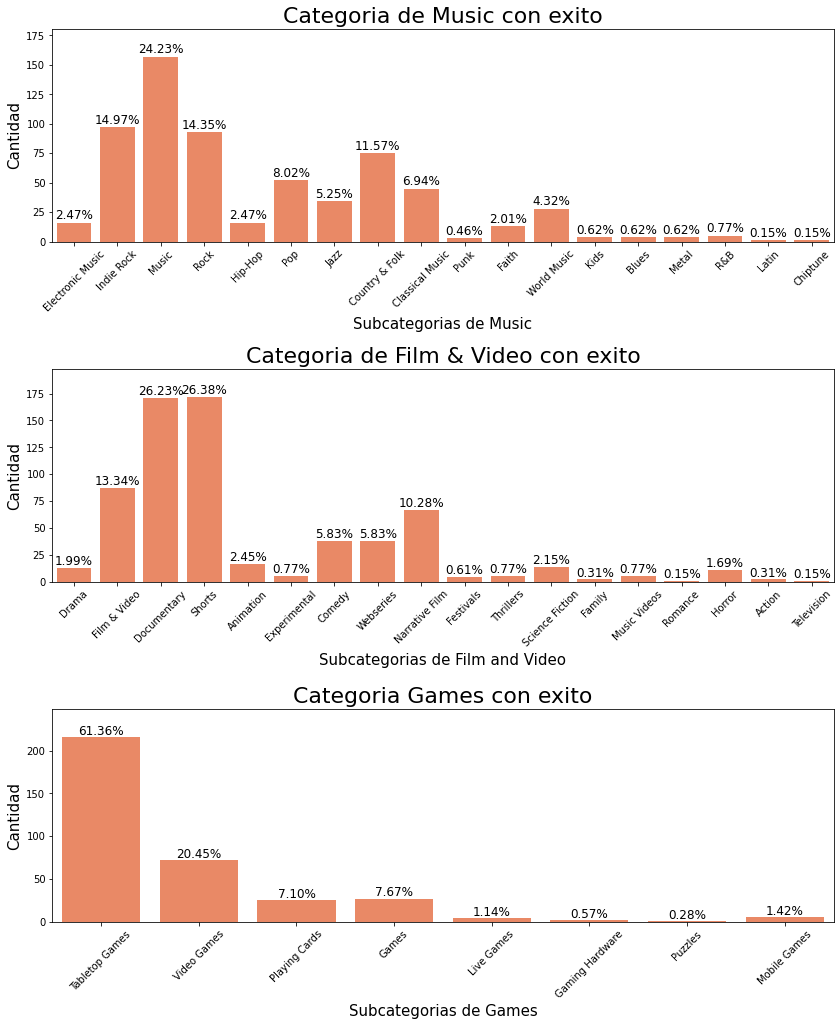

In [66]:
sucess_music = df_kick[(df_kick['main_category'] == 'Music') & 
                      (df_kick['state'] == 'successful')]
sucess_filme_video = df_kick[(df_kick['main_category'] == 'Film & Video') & 
                      (df_kick['state'] == 'successful')]
sucess_games = df_kick[(df_kick['main_category'] == 'Games') & 
                      (df_kick['state'] == 'successful')]

plt.figure(figsize=(14,16))
total = len(df_kick)
plt.subplot(311)
ax0 = sns.countplot(x='category', data=sucess_music,
                    color='coral')
ax0.set_xticklabels(ax0.get_xticklabels(),rotation=45)
ax0.set_title("Categoria de Music con exito", fontsize=22)
ax0.set_xlabel("Subcategorias de Music", fontsize=15)
ax0.set_ylabel("Cantidad", fontsize=15)
sizes=[]
for p in ax0.patches:
    height = p.get_height()
    sizes.append(height)
    ax0.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(sucess_music)*100),
            ha="center", fontsize=12) 
ax0.set_ylim(0, max(sizes) * 1.15)


plt.subplot(312)
ax1 = sns.countplot(x='category', data=sucess_filme_video,
                    color='coral')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
ax1.set_title("Categoria de Film & Video con exito", fontsize=22)
ax1.set_xlabel("Subcategorias de Film and Video", fontsize=15)
ax1.set_ylabel("Cantidad", fontsize=15)
sizes=[]
for p in ax1.patches:
    height = p.get_height()
    sizes.append(height)
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(sucess_filme_video)*100),
            ha="center", fontsize=12) 
ax1.set_ylim(0, max(sizes) * 1.15)

plt.subplot(313)
ax2 = sns.countplot(x='category', data=sucess_games,
                    color='coral')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45)
ax2.set_title("Categoria Games con exito", fontsize=22)
ax2.set_xlabel("Subcategorias de Games", fontsize=15)
ax2.set_ylabel("Cantidad", fontsize=15)
sizes=[]
for p in ax2.patches:
    height = p.get_height()
    sizes.append(height)
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(sucess_games)*100),
            ha="center", fontsize=12) 
ax2.set_ylim(0, max(sizes) * 1.15)

plt.subplots_adjust(wspace = 0.3, hspace = 0.6,top = 0.9)

plt.show()

<h2>Categorias Principales(main_category)</h2>

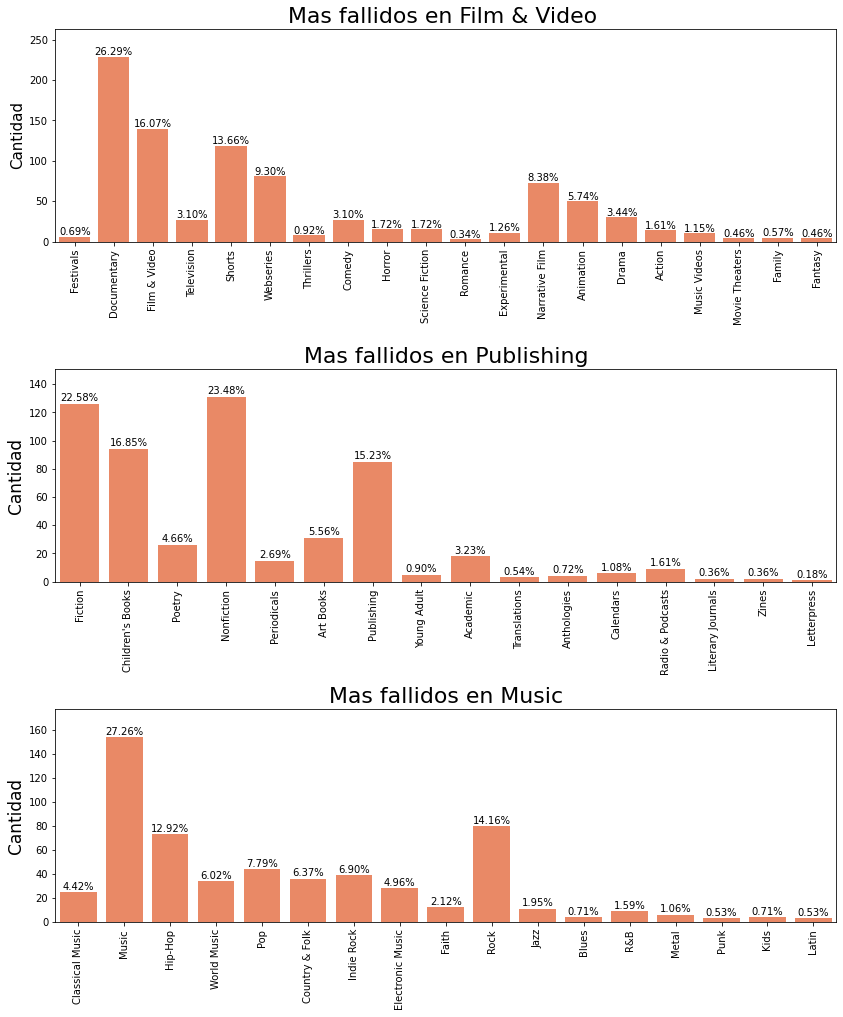

In [69]:
failed_film = df_kick[(df_kick['main_category'] == 'Film & Video') & 
                      (df_kick['state'] == 'failed')]
failed_publishing = df_kick[(df_kick['main_category'] == 'Publishing') & 
                      (df_kick['state'] == 'failed')]
failed_music = df_kick[(df_kick['main_category'] == 'Music') & 
                      (df_kick['state'] == 'failed')]

plt.figure(figsize=(14,16))

plt.subplot(3,1,1)
ax0 = sns.countplot(x='category', data=failed_film, color='coral')
ax0.set_xticklabels(ax0.get_xticklabels(),rotation=90)
ax0.set_title("Mas fallidos en Film & Video ", fontsize=22)
ax0.set_xlabel("", fontsize=15)
ax0.set_ylabel("Cantidad", fontsize=15)
sizes=[]
for p in ax0.patches:
    height = p.get_height()
    sizes.append(height)
    ax0.text(p.get_x()+p.get_width()/2.,
            height + 2,
            '{:1.2f}%'.format(height/len(failed_film)*100),
            ha="center", fontsize=10) 
ax0.set_ylim(0, max(sizes) * 1.15)

plt.subplot(3,1,2)
ax1 = sns.countplot(x='category', data=failed_publishing, color='coral')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.set_title("Mas fallidos en Publishing", fontsize=22)
ax1.set_xlabel("", fontsize=17)
ax1.set_ylabel("Cantidad", fontsize=17)
sizes=[]
for p in ax1.patches:
    height = p.get_height()
    sizes.append(height)
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 2,
            '{:1.2f}%'.format(height/len(failed_publishing)*100),
            ha="center", fontsize=10) 
ax1.set_ylim(0, max(sizes) * 1.15)

plt.subplot(3,1,3)
ax2 = sns.countplot(x='category', data=failed_music, 
                    color='coral')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax2.set_title("Mas fallidos en Music", fontsize=22)
ax2.set_xlabel("", fontsize=17)
ax2.set_ylabel("Cantidad", fontsize=17)
sizes=[]
for p in ax2.patches:
    height = p.get_height()
    sizes.append(height)
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 2,
            '{:1.2f}%'.format(height/len(failed_music)*100),
            ha="center", fontsize=10) 
ax2.set_ylim(0, max(sizes) * 1.15)

plt.subplots_adjust(wspace = 0.5, hspace = 0.6,top = 0.9)

plt.show()

<b>Como observaciones de las escalas encontradas podemos ver que:</b>

- En las músicas con éxito el más frecuente es el Indie.
- Los que fallan usualemente son el Rock y el Hip Hop.
- En Films con éxito más frecuente estan los Documentales y los Cortos aunque a la vez son los cuales mas fallan.
- En las publicaciones fallan los contenidos de Ficcion


<h1> Fijandonos en las Fechas </h1>


In [10]:
df_kick['launched'] = pd.to_datetime(df_kick['launched'])
df_kick['launched_date'] = df_kick['launched'].dt.date

df_kick['deadline'] = pd.to_datetime(df_kick['deadline'])
df_kick['deadline_date'] = df_kick['deadline'].dt.date


In [9]:
#Creando nuevas columnas con nro total de meses
df_kick['time_campaign_d'] = (df_kick['deadline_date'] - df_kick['launched_date']).dt.days
df_kick['time_campaign_d'] = df_kick['time_campaign_d'].astype(int)


df_kick = df_kick[df_kick['time_campaign_d'] != 14867]

df_kick['time_campaign'] = round(df_kick['time_campaign_d'] / 30 )

# Meses de Campaña

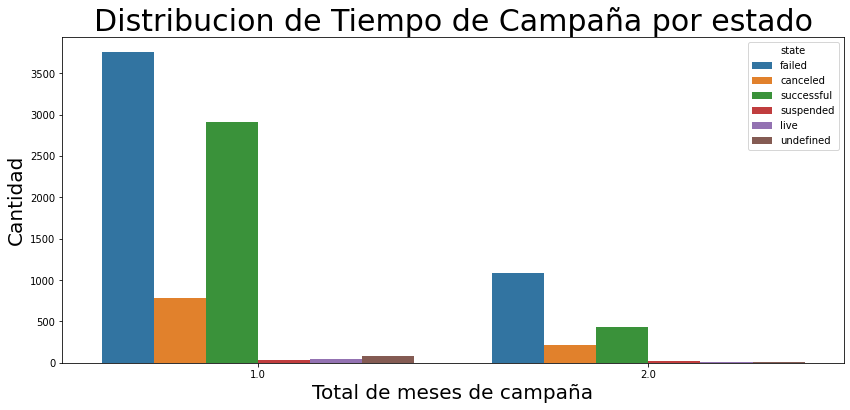

In [12]:
plt.figure(figsize = (14,6))

ax = sns.countplot(x='time_campaign', hue='state', 
                   data=df_kick[(df_kick['time_campaign'] > .7) & 
                                (df_kick['time_campaign'] < 2.1)])
ax.set_title("Distribucion de Tiempo de Campaña por estado", fontsize=30)
ax.set_xlabel("Total de meses de campaña", fontsize=20)
ax.set_ylabel("Cantidad", fontsize=20)
plt.show()

La mayor parte de los proyectos tienen 1 mes de campaña. Podemos ver que la proporción de campañas exitosas de un mes es mejor que la de proyectos con 1.5 o 2 meses de campaña.

# Distribuciones de Lanzamiento

In [13]:
df_kick['laun_month_year'] = df_kick.launched.dt.month
df_kick['laun_year'] = df_kick.launched.dt.year


##  Distribucion de fecha de Lanzamiento

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning:

invalid value encountered in multiply

/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1183: RuntimeWarning:

invalid value encountered in double_scalars



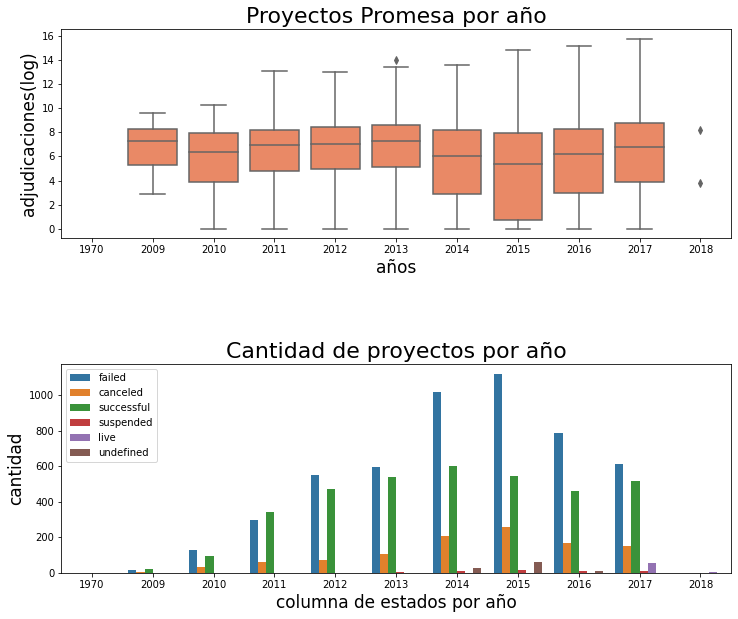

In [17]:
year = df_kick.laun_year.value_counts()
month = df_kick.laun_month_year.value_counts()

fig, ax = plt.subplots(2,1, figsize=(12,10))

plt.subplot(211)
ax1 = sns.boxplot(x="laun_year", y='pledged_log', 
                  data=df_kick, color='coral')
ax1.set_title("Proyectos Promesa por año", fontsize=22)
ax1.set_xlabel("años", fontsize=17)
ax1.set_ylabel("adjudicaciones(log)", fontsize=17)

plt.subplot(212)
ax2 = sns.countplot(x="laun_year", hue='state', 
                    data=df_kick )
ax2.set_title("Cantidad de proyectos por año", fontsize=22)
ax2.set_xlabel("columna de estados por año", fontsize=17)
ax2.set_ylabel("cantidad", fontsize=17)
ax2.legend(loc='upper left')

plt.subplots_adjust(hspace = 0.6)

plt.show()


<b>Vemos que durante el paso de los años se han dado situaciones interesantes:</b>
- La cantidad de patrocinadores fue creciendo desde el 2009 hasta que en 2014 las suma de adjudicaciones fue reduciendose a pesar de que las metas hayan sido mayores lo cual implica un factor economico entre 2014-actualidad.
- Asi tambien la cantidad de proyectos fallidos tiende a ser mayor en cada año con relacion a los que pudieron efectuarse (con excepcion del 2011). 

## Distribucion de lanzamiento en meses

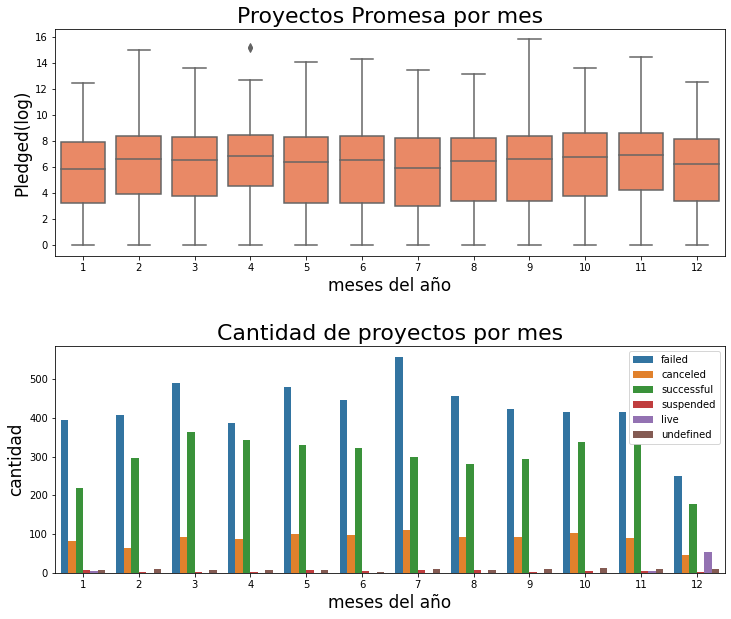

In [18]:
fig, ax = plt.subplots(2,1, figsize=(12,10))

plt.subplot(211)
ax1 = sns.boxplot(x="laun_month_year", y='pledged_log', 
                  data=df_kick, color='coral')
ax1.set_title("Proyectos Promesa por mes", fontsize=22)
ax1.set_xlabel("meses del año", fontsize=17)
ax1.set_ylabel("Pledged(log)", fontsize=17)

plt.subplot(212)
ax2 = sns.countplot(x="laun_month_year", hue='state', 
                    data=df_kick )
ax2.set_title("Cantidad de proyectos por mes", fontsize=22)
ax2.set_xlabel("meses del año", fontsize=17)
ax2.set_ylabel("cantidad", fontsize=17)
ax2.legend(loc='upper right')

plt.subplots_adjust(hspace = 0.4)

plt.show()


- Todos los meses tienen practicamente un resultado similar.

# naaaaaaaahhh Month Launched projects

In [32]:
df_kick['laun_month_year'] = df_kick['launched'].dt.to_period('M').astype(str)

ValueError: min() arg is an empty sequence

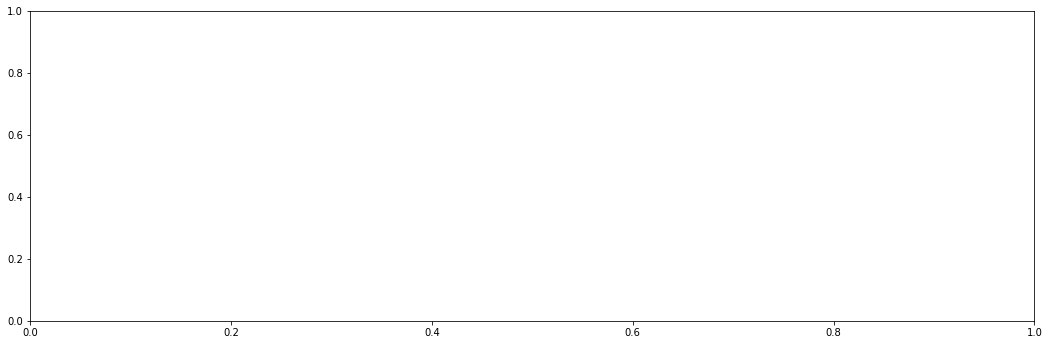

In [20]:
plt.figure(figsize = (18,15))

plt.subplots_adjust(hspace = 0.35, top = 0.8)

g1 = plt.subplot(211)
g1 = sns.countplot(x="laun_month_year", data=df_kick, color='coral',
                   order=df_kick['laun_month_year'].value_counts().index.sort_values()[19:] )
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_title("Value Distribuition by Date Distribuition", fontsize=30)
g1.set_xlabel("Date Distribuition", fontsize=20)
g1.set_ylabel("Count", fontsize=20)

g2 = plt.subplot(212)
g2 = sns.boxplot(x="laun_year", y="diff_pledged_goal",
                 data=df_kick[df_kick['diff_pledged_goal'] < 200], 
                 hue="state")
g2.set_xticklabels(g2.get_xticklabels(),rotation=90)
g2.set_title("Value Distribuition by Date Distribuition", fontsize=22)
g2.set_xlabel("Date Distribuition", fontsize=17)
g2.set_ylabel("Goal x Pledged (%)", fontsize=17)

plt.show()

Cool. We can see that in august 2018 was the peak of projects launched. 
Looking the difference pledged x goal between failed and sucessful 

# naaaaaaaaah Goals 

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning:

invalid value encountered in multiply

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning:

invalid value encountered in multiply

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning:

invalid value encountered in multiply



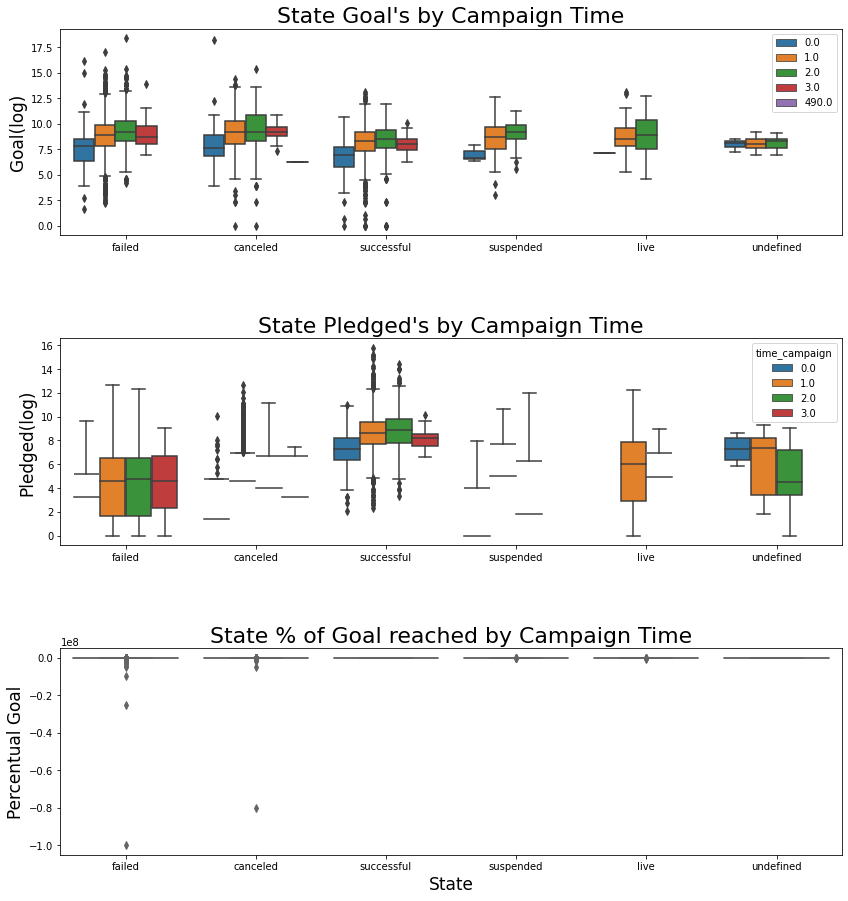

In [22]:
plt.figure(figsize = (14,17))

plt.subplots_adjust(hspace = 0.50, top = 0.8)

plt.subplot(311)
g =sns.boxplot(x='state', y='goal_log', 
            data=df_kick, 
            hue='time_campaign')
g.set_title("State Goal's by Campaign Time", fontsize=22)
g.set_xlabel("", fontsize=17)
g.set_ylabel("Goal(log)", fontsize=17)
g.legend(loc='upper right')

plt.subplot(312, sharex=g)
g1 = sns.boxplot(x='state', y='pledged_log', 
            data=df_kick[df_kick['time_campaign'] < 10], 
            hue='time_campaign')
g1.set_title("State Pledged's by Campaign Time", fontsize=22)
g1.set_xlabel("", fontsize=17)
g1.set_ylabel("Pledged(log)", fontsize=17)

plt.subplot(313)
g2 = sns.boxplot(x='state', y='diff_pledged_goal', color='coral',
                 data=df_kick[df_kick['diff_pledged_goal'] < 300])
g2.set_title("State % of Goal reached by Campaign Time", fontsize=22)
g2.set_xlabel("State", fontsize=17)
g2.set_ylabel("Percentual Goal", fontsize=17)


plt.show()

Humm... Its an very interesting information.<br>
On the first chart, we can clearly see that projects with more than 30 to 60 days have highest vales pledged, what make many sense. <br>
Also, we can see that the median of goal reached is like to 120;  Let's s

In [23]:
df_kick.groupby(['state'])['diff_pledged_goal'].median()

state
canceled     -9124.5
failed       -6184.0
live         -3520.0
successful     534.5
suspended    -4994.0
undefined        0.0
Name: diff_pledged_goal, dtype: float64

# Distribucion de Patrocinadores

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



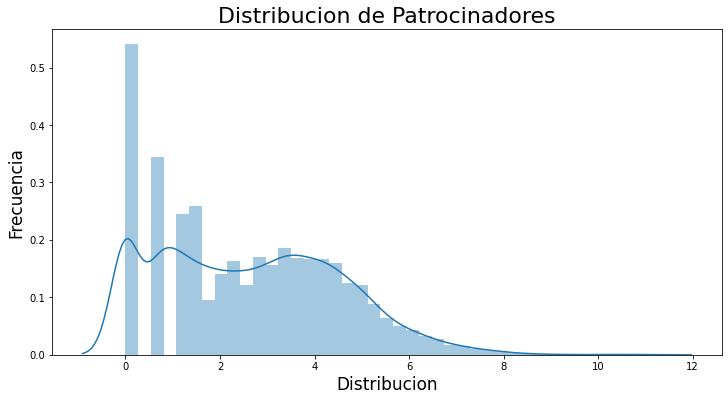

In [25]:
df_kick['backers_log'] = np.log(df_kick['backers'] + 1 ) 
#para normalizar valor 0 se hace valor +1
plt.figure(figsize = (12,6))
g = sns.distplot(df_kick['backers_log'])
g.set_xlabel("Distribucion", fontsize=17)
g.set_ylabel("Frecuencia", fontsize=17)
g.set_title("Distribucion de Patrocinadores", fontsize=22)

plt.show()

# Patrocinadores por estado

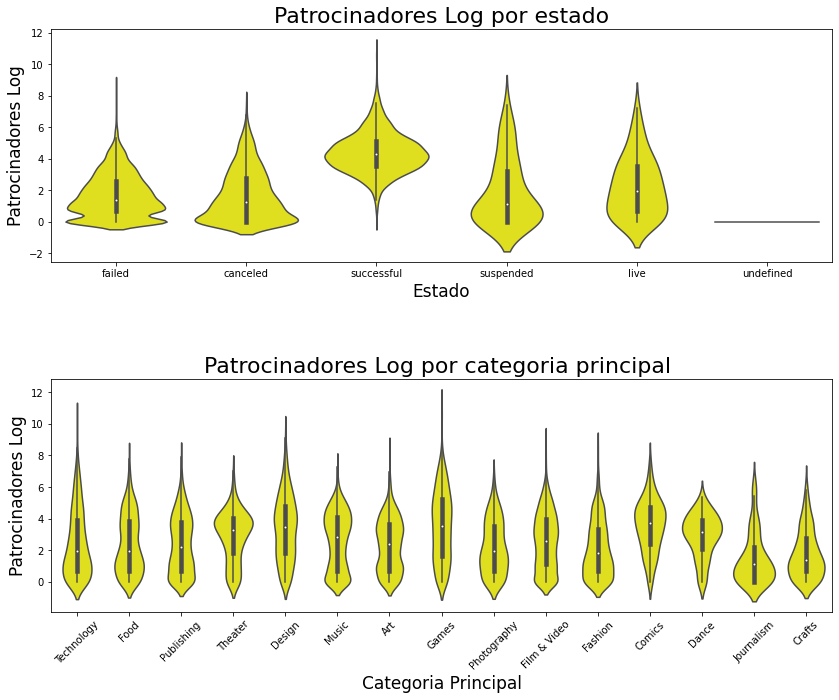

In [28]:
plt.figure(figsize = (14,12))

plt.subplots_adjust(hspace = 0.50, top = 0.8)

plt.subplot(211)
g = sns.violinplot(x='state',y='backers_log',
                   color='yellow', data=df_kick)
g.set_title("Patrocinadores Log por estado", fontsize=22)
g.set_xlabel("Estado", fontsize=17)
g.set_ylabel("Patrocinadores Log", fontsize=17)

plt.subplot(212)
g1 = sns.violinplot(x='main_category',y='backers_log', 
                   color='yellow', data=df_kick)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_title("Patrocinadores Log por categoria principal ", fontsize=22)
g1.set_xlabel("Categoria Principal", fontsize=17)
g1.set_ylabel("Patrocinadores Log", fontsize=17)

plt.show()

## Backers by Years

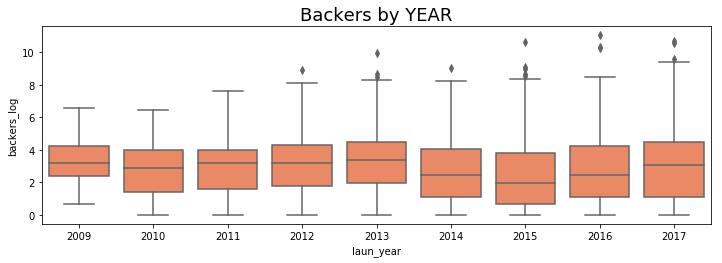

In [38]:
plt.figure(figsize = (12,8))

plt.subplot(211)
g = sns.boxplot(x='laun_year',y='backers_log', 
                color='coral',
               data=df_kick, 
                order=df_kick['laun_year'].value_counts().index.sort_values().values)
g.set_title("Backers by YEAR", fontsize=18)

plt.show()

# Word Cloud - Project Names

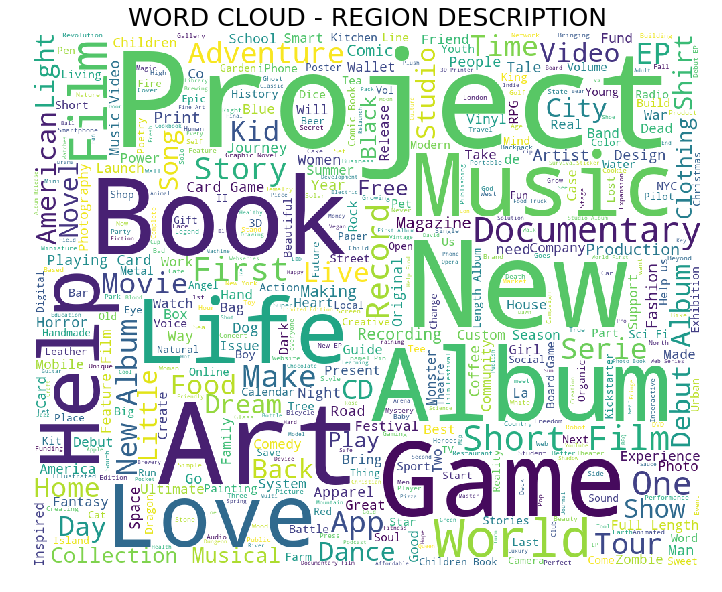

In [39]:
from wordcloud import WordCloud, STOPWORDS
import nltk.tokenize as word_tokenize
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re
from nltk.stem.porter import *
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction import stop_words

from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=500,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(df_kick['name'].dropna().astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - REGION DESCRIPTION",fontsize=25)
plt.axis('off')

plt.show()

# Modeling 
I will reimport the dataset, but now I use it FULL

## ML needed Libraries 

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale

#Importing the auxiliar and preprocessing librarys 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score

#Models
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, RandomTreesEmbedding

In [41]:
df_kick = pd.read_csv("../input/ks-projects-201801.csv")

# Filtering by successful and failed projects

In [42]:
df_kick = df_kick.loc[df_kick['state'].isin(['failed','successful'])]

## encoding our target

In [43]:
targ_dict = {'failed': 0,
             'successful': 1 
            }

df_kick['state'] = df_kick['state'].map(targ_dict)

# Dealing with date features

In [44]:
df_kick['launched'] = pd.to_datetime(df_kick['launched'])
df_kick['launched_date'] = df_kick['launched'].dt.date

df_kick['deadline'] = pd.to_datetime(df_kick['deadline'])
df_kick['deadline_date'] = df_kick['deadline'].dt.date

#Creating a new columns with Campaign total months
df_kick['time_campaign_d'] = (df_kick['deadline_date'] - df_kick['launched_date']).dt.days
df_kick['time_campaign_d'] = df_kick['time_campaign_d'].astype(int)

#removing outlier value
df_kick = df_kick[df_kick['time_campaign_d'] != 14867]

In [45]:
to_drop = ['ID', 'name', 'deadline', 'pledged', 'backers', 'goal',
            'usd pledged', 'usd_pledged_real','launched_date', 'deadline_date']

In [46]:
df_kick.drop(to_drop, axis=1, inplace=True)

# Head of data after droping

In [47]:
df_kick.head()

category main_category currency            launched  state country  \
0          Poetry    Publishing      GBP 2015-08-11 12:12:28      0      GB   
1  Narrative Film  Film & Video      USD 2017-09-02 04:43:57      0      US   
2  Narrative Film  Film & Video      USD 2013-01-12 00:20:50      0      US   
3           Music         Music      USD 2012-03-17 03:24:11      0      US   
5     Restaurants          Food      USD 2016-02-26 13:38:27      1      US   

   usd_goal_real  time_campaign_d  
0        1533.95               59  
1       30000.00               60  
2       45000.00               45  
3        5000.00               30  
5       50000.00               35

In [48]:
df_kick = df_kick.assign(hour=df_kick.launched.dt.hour,
                         day=df_kick.launched.dt.day,          
                         month=df_kick.launched.dt.month,
                         year=df_kick.launched.dt.year).drop('launched', axis=1)

# Get Dummies

In [49]:
print(f'Shape before dummy transformation: {df_kick.shape}')
df_kick = pd.get_dummies(df_kick, columns=['category', 'main_category', 'currency', 'country'],\
                          prefix=['cat', 'main_cat', 'currency', 'country'], drop_first=True)

print(f'Shape after dummy transformation: {df_kick.shape}')

Shape before dummy transformation: (331675, 11)
Shape after dummy transformation: (331675, 214)


Cool. Now we have a sparse table;

# MinMax Scaler

In [50]:
num_cols = ['usd_goal_real', 'time_campaign_d']

for col in num_cols:
    df_kick[col] = (minmax_scale(df_kick[col], feature_range=(0,1)))

# Spliting our data in train, validation and test sets

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df_kick.drop('state', axis=1), df_kick['state'], 
                                                    test_size=.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.15, random_state=42)

# Shape of data after spliting the data

In [52]:
print(f'Shape train: {X_train.shape}')
print(f'Shape valid: {X_val.shape}')
print(f'Shape test: {X_test.shape}')

Shape train: (225539, 213)
Shape valid: (39801, 213)
Shape test: (66335, 213)


# Models Pipeline

LogReg: 0.713009 (+/- 0.002954)
XGBClassifier: 0.735225 (+/- 0.002832)
DecisionTreeClassifier: 0.594193 (+/- 0.001161)
RandomForestClassifier: 0.735806 (+/- 0.001278)
GradientBoostingClassifier: 0.744727 (+/- 0.002911)
RidgeClassifier: 0.693229 (+/- 0.002581)
BaggingRidgeClassifier: 0.693612 (+/- 0.001676)
ExtraTreesClassifier: 0.675114 (+/- 0.002314)


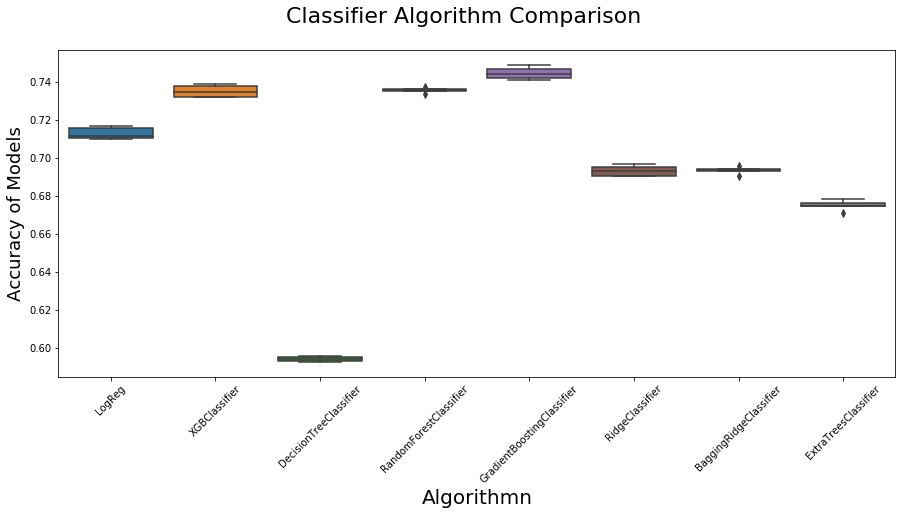

In [53]:
clfs = []
seed = 3

clfs.append(("LogReg", 
             Pipeline([("Scaler", StandardScaler()),
                       ("LogReg", LogisticRegression(n_jobs=-1, random_state=42))])))

clfs.append(("XGBClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("XGB", XGBClassifier(n_jobs=-1, random_state=42))]))) 
#clfs.append(("KNN", 
#             Pipeline([("Scaler", StandardScaler()),
#                       ("KNN", KNeighborsClassifier(n_jobs=-1))]))) 

clfs.append(("DecisionTreeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("DecisionTrees", DecisionTreeClassifier(random_state=42))]))) 

clfs.append(("RandomForestClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RandomForest", RandomForestClassifier(n_estimators=200, n_jobs=-1, 
                                                               random_state=42))]))) 

clfs.append(("GradientBoostingClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("GradientBoosting", GradientBoostingClassifier(n_estimators=200,
                                                                       random_state=42))]))) 

clfs.append(("RidgeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RidgeClassifier", RidgeClassifier(random_state=42))])))

clfs.append(("BaggingRidgeClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("BaggingClassifier", BaggingClassifier(n_jobs=-1, random_state=42))])))

clfs.append(("ExtraTreesClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("ExtraTrees", ExtraTreesClassifier(n_jobs=-1, random_state=42))])))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'roc_auc'
n_folds = 5

results, names  = [], [] 

for name, model  in clfs:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, 
                                 cv= n_folds, scoring=scoring,
                                 n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Classifier Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn", fontsize=20)
ax.set_ylabel("Accuracy of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.show()

Cool Gradient Boosting, XGB have the best results so I will select them. <br>
Also, I will seelect the Logistic Regression too. 
<br>
The Decision tree and Extra trees are the models with the lowest roc_auc scores.

# Predicting the X_test with best models

#### function to get different models score

In [54]:
from sklearn.metrics import roc_auc_score
def get_models_score(model, X, y, X_val, y_val):
    # Using the model in X_train and y_train desired
    model.fit(X, y)
    
    # Predicting our validation test
    y_pred = model.predict_proba(X_val)[:,1]
    score = roc_auc_score(y_val, y_pred)
    
    return score, y_pred

## GradientBoostClassifier

In [55]:
gb_clf = GradientBoostingClassifier(n_estimators=500, random_state=42) 

score, pred = get_models_score(gb_clf, X_train, y_train,
                                X_test, y_test)

print(f'Score of: {score} \n')
#print("Confusion Matrix: ")
#print(confusion_matrix(y_test, pred))

Score of: 0.7492588989762836 



Cool!!! <br>
Now, let's see if the Logreg will be better or worst. It would be interesting if we use hyperopt to optimze the parameters, but I will start by a benchmark. 

# Logistic Regression

In [56]:
lr_clf = LogisticRegression(n_jobs=-1) 

score, pred = get_models_score(lr_clf, X_train, y_train, 
                               X_test, y_test)

print(f'Score of: {score} \n')
#print("Confusion Matrix: ")
#print(confusion_matrix(y_test, pred))

Score of: 0.6889010590827982 



# NOTE: This kernel isn't finished 

## Some fonts that I used to the statistical tests: 
https://machinelearningmastery.com/chi-squared-test-for-machine-learning/ <br>
http://math.hws.edu/javamath/ryan/ChiSquare.html<br>
https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce <br>
http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf <br>